In [32]:

import numpy as np
from scipy.signal import resample

# Load the data
#avg_entries = np.load("../../../sca101/generators/new_entries.npy")
#subset_traces = np.load("../../../sca101/generators/averaged_traces1000-0.890.npy")#avg_entries = np.load("destination/folder/var_0/inputs.npy")
#subset_traces = np.load("destination/folder/var_0/traces.npy")
avg_entries = np.load("avg_entries.npy")
subset_traces = np.load("avg_traces.npy")
# Select 50 inputs and their corresponding traces without limiting the number of points
selected_avg_entries = avg_entries[:300]
selected_subset_traces = subset_traces[:300]

# Resample the traces to 5000 points
resampled_subset_traces = resample(selected_subset_traces, 5000, axis=1)

# Data cleaning: Remove NaN and extreme values

# Remove NaN values from selected_avg_entries
nan_indices = np.argwhere(np.isnan(selected_avg_entries))
cleaned_avg_entries = np.delete(selected_avg_entries, nan_indices, axis=0)

# Remove corresponding traces
cleaned_subset_traces = np.delete(resampled_subset_traces, nan_indices, axis=0)

np.save("cleaned_avg_entries300.npy", cleaned_avg_entries)

np.save("cleaned_avg_traces300.npy", cleaned_subset_traces)

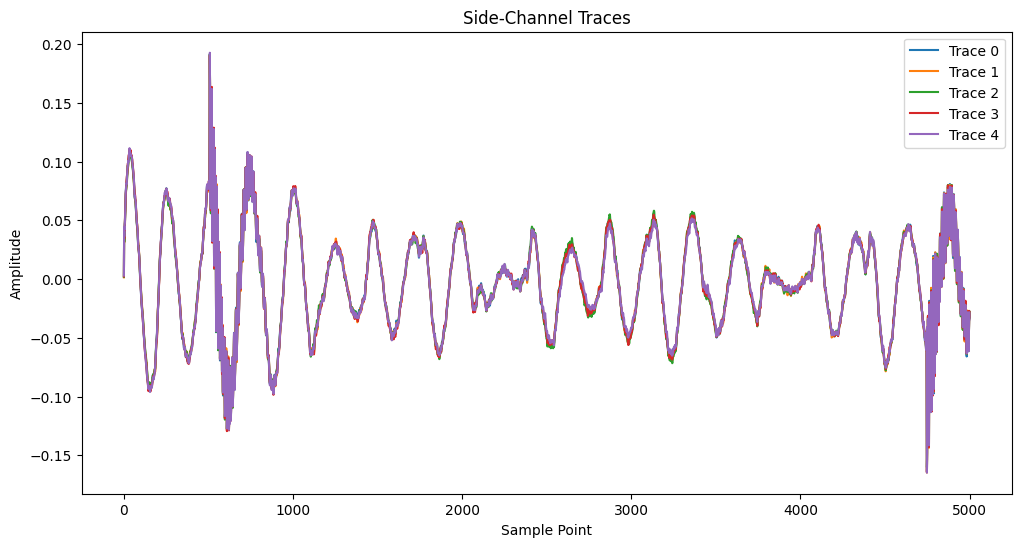

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import struct

traces = cleaned_subset_traces
inputs = cleaned_avg_entries

    
# Visualize some traces
plt.figure(figsize=(12, 6))
for i in range(5):  # Adjust the range as needed
    plt.plot(traces[i], label=f'Trace {i}')
plt.title('Side-Channel Traces')
plt.xlabel('Sample Point')
plt.ylabel('Amplitude')
plt.legend()
plt.show()






In [25]:
# Define hypothetical weight values
hypothetical_weights = np.arange(0.7, 0.9, 0.001)




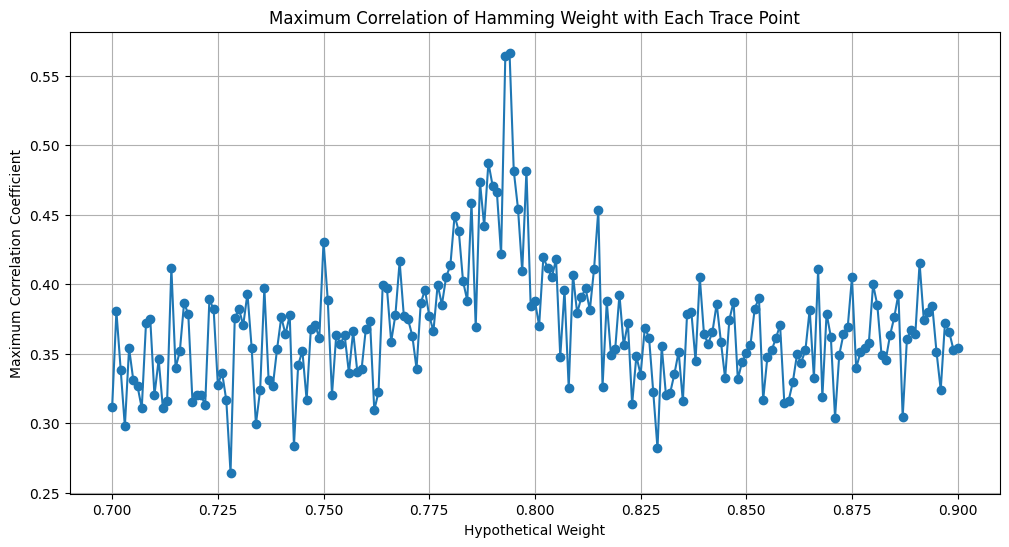

In [26]:
from tqdm.notebook import tqdm
# Analyze a trace
#selected_trace = traces[0]
#input_value = inputs[0]

def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

# Initialize an array to hold the maximum correlation for each hypothetical weight
max_correlations = np.zeros(len(hypothetical_weights))

# Loop over each hypothetical weight
for index, weight in enumerate(hypothetical_weights):
    # Compute the HW for each input multiplied by the hypothetical weight
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    # Compute correlation for each sample point and find the maximum correlation
    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)])
    
    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    # Find the maximum correlation for this hypothetical weight
    max_correlations[index] = np.max(np.abs(correlations))
    print(f"Progress: {index+1}/{len(hypothetical_weights)}", end='\r')
# Plotting the maximum correlations against hypothetical weights
plt.figure(figsize=(12, 6))
plt.plot(hypothetical_weights, max_correlations, marker='o')
plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
plt.xlabel('Hypothetical Weight')
plt.ylabel('Maximum Correlation Coefficient')
plt.grid()
plt.show()

In [27]:
# Define hypothetical weight values
hypothetical_weights = np.arange(0.788, 0.798, 0.0001)

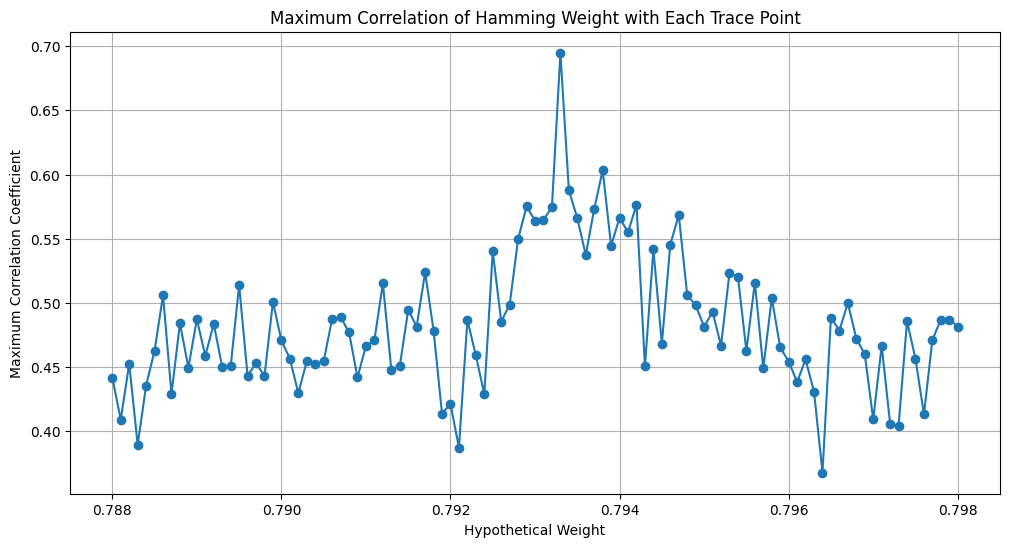

In [28]:
from tqdm.notebook import tqdm
# Analyze a trace
#selected_trace = traces[0]
#input_value = inputs[0]

def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

# Initialize an array to hold the maximum correlation for each hypothetical weight
max_correlations = np.zeros(len(hypothetical_weights))

# Loop over each hypothetical weight
for index, weight in enumerate(hypothetical_weights):
    # Compute the HW for each input multiplied by the hypothetical weight
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    # Compute correlation for each sample point and find the maximum correlation
    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)])
    
    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    # Find the maximum correlation for this hypothetical weight
    max_correlations[index] = np.max(np.abs(correlations))
    print(f"Progress: {index+1}/{len(hypothetical_weights)}", end='\r')
# Plotting the maximum correlations against hypothetical weights
plt.figure(figsize=(12, 6))
plt.plot(hypothetical_weights, max_correlations, marker='o')
plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
plt.xlabel('Hypothetical Weight')
plt.ylabel('Maximum Correlation Coefficient')
plt.grid()
plt.show()

In [29]:
# Define hypothetical weight values
hypothetical_weights = np.arange(0.7930, 0.7936, 0.00001)

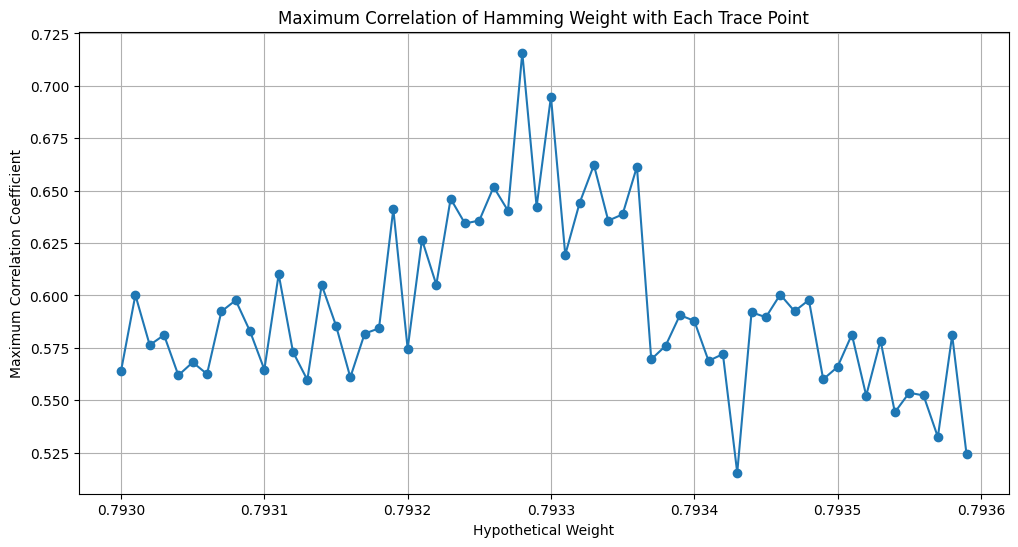

In [31]:
from tqdm.notebook import tqdm
# Analyze a trace
#selected_trace = traces[0]
#input_value = inputs[0]

def float_to_binary(num):
    """Convert a floating point number to its binary representation in IEEE 754 format."""
    return ''.join(f'{c:08b}' for c in struct.pack('!f', num))

def hamming_weight(binary_str):
    """Calculate the Hamming weight (number of '1's) in the binary string."""
    return binary_str.count('1')

# Number of sample points in each trace
num_sample_points = traces.shape[1]

# Initialize an array to hold the maximum correlation for each hypothetical weight
max_correlations = np.zeros(len(hypothetical_weights))

# Loop over each hypothetical weight
for index, weight in enumerate(hypothetical_weights):
    # Compute the HW for each input multiplied by the hypothetical weight
    hws = [hamming_weight(float_to_binary(input_value * weight)) for input_value in inputs]

    # Compute correlation for each sample point and find the maximum correlation
    correlations = np.array([pearsonr(traces[:, sample_point], hws)[0] for sample_point in range(num_sample_points)])
    
    # Handle NaN values
    correlations = np.nan_to_num(correlations)

    # Find the maximum correlation for this hypothetical weight
    max_correlations[index] = np.max(np.abs(correlations))
    print(f"Progress: {index+1}/{len(hypothetical_weights)}", end='\r')
# Plotting the maximum correlations against hypothetical weights
plt.figure(figsize=(12, 6))
plt.plot(hypothetical_weights, max_correlations, marker='o')
plt.title('Maximum Correlation of Hamming Weight with Each Trace Point')
plt.xlabel('Hypothetical Weight')
plt.ylabel('Maximum Correlation Coefficient')
plt.grid()
plt.show()